In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import hdf5plugin
import scipy.optimize
import csv

In [2]:
file = '2159_MS48_H1_AM1.5G_293K.dat'
df = pd.read_csv(file, sep='\t',header=2,names=["V", "I"])
#Now we want to at the current density in mA/cm2 as a new colum
surface = 214E-6 #cm2
df["J"] = df["I"]*1000/surface #mA/cm2

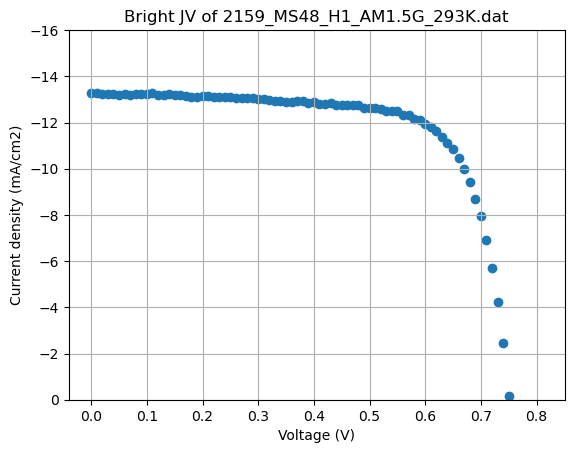

In [3]:
#plot the bright JV curve
plt.scatter(df['V'], df['J'])
plt.xlabel('Voltage (V)')
plt.ylabel('Current density (mA/cm2)')
#plt.yscale('log')
plt.grid()
#plt.invert_yaxis()
plt.ylim([-16,0])
plt.title('Bright JV of '+file)
plt.gca().invert_yaxis()
plt.show()

In [4]:
#get KPIs
Jsc = df['J'][0]
print('Jsc',Jsc)

#Voc
index_Voc = (df['J']-0).abs().idxmin()
Voc = np.interp([0],df['J'][index_Voc-1:index_Voc+2],df['V'][index_Voc-1:index_Voc+2])[0] #interpolate the inverse: voltage and current to get voltage at 0
print('Voc',Voc)

#MPP
df['Power'] = df['V']*df['J']
index_MPP = df['Power'][:index_Voc].abs().idxmax() #what is the MPP position within the negative quadrant, below Voc
V_MPP = df['V'][index_MPP]
J_MPP = df['J'][index_MPP]
print('V_MPP',V_MPP)
print('J_MPP',J_MPP)

#FF
FF = (V_MPP*J_MPP)/(Voc*Jsc)
print('FF',FF)

Jsc -13.29532710280374
Voc 0.7506343618538011
V_MPP 0.62
J_MPP -11.623831775700934
FF 0.7221269239301773


In [5]:
#get Rs and Rsh
#select 3 points for the fit

Rsh = 1/((df['I'][2]-df['I'][0])/(df['V'][2]-df['V'][0]))
print('Rsh in Ohm ',Rsh)

Rs = 1/((df['I'][index_Voc-1]-df['I'][index_Voc+2])/(df['V'][index_Voc-1]-df['V'][index_Voc+2]))
print('Rs in Ohm',Rs)


Rsh in Ohm  1941747.5728155877
Rs in Ohm 17198.87634007913


In [6]:
##### get the Temperature sweeps
def get_2sweep_info(file_2sweep,category):
    f = h5py.File(file_2sweep, 'r')
    sweeps = f[category]['Sweeps']
    sweep0 = sweeps['Sweep0'] 
    sweep1 = sweeps['Sweep1']
    info = {}
    info['sweep0'] = {'name':sweep0.attrs['name'],'values' : sweep0['values']}
    info['sweep1'] = {'name':sweep1.attrs['name'],'values' : sweep1['values']}
    return info

def prep_data_2sweep(file_2sweep,category,measurement):
    f = h5py.File(file_2sweep, 'r')
    data = f[category][measurement]
    print(data.shape)
    return get_2sweep_info(file_2sweep,category),data

(6, 161)


Text(0, 0.5, 'Current Density (mA/cm2)')

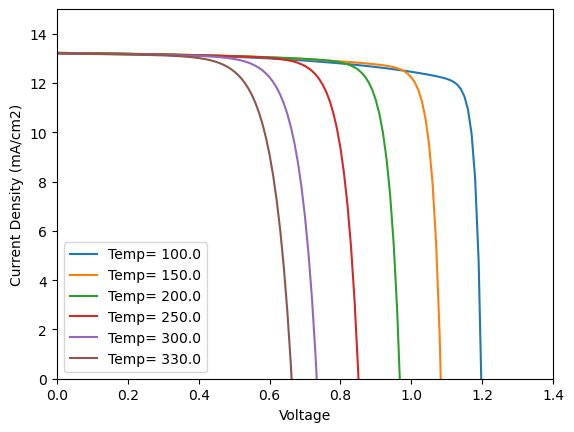

In [14]:
#plot the sweep 
file_2sweep = "GaAs_real_T_sweep.h5"
info, data = prep_data_2sweep(file_2sweep,'electric_figures.txt','J')
for i in range(0,len(info['sweep0']['values'])):
    label= info['sweep0']['name']+'= '+str(info['sweep0']['values'][i])
    plt.plot(info['sweep1']['values'][:],-1*data[i,:],label=label)
plt.legend()
plt.ylim([0,15])
plt.xlim([0,1.4])
plt.xlabel("Voltage")
plt.ylabel("Current Density (mA/cm2)")